## <center>COMP20008 - 2018 - SM2 - Project Phase 1</center>
<center>Release Date: 11:59am Monday, $13^{th}$ August 2018</center>
<center>Due Date: 11:59am Friday, $31^{st}$ August 2018</center>
<center>Submission is via the LMS</center>
<span style="color:red">Please, make sure you get a submission confirmation email once you submit your assignment. Otherwise, it will be considered as a late submission.</span> 

#### Phase 1: Warmup - Python Exercises (20 marks, worth 20% of subject grade) 

In this phase, you will practice your Python wrangling skills with a publicly available dataset. The dataset is obtained through the TMDB (The Movie DB) API. It contains information on movies featured in the Full MovieLens Dataset and released on or before July 2017. The main features of the Movies Metadata file include posters, backdrops, budget, revenue, release dates, languages, production countries and companies. 

You will be working with the following dataset in this phase: 
- Movies\_tmdb.csv: It has a set of movie records (approx. 45,000), released **on or before July 2017**. Note that this dataset is quite large, and you may find it beneficial during development, to first test your code on a smaller sample of this data.

Libraries to use are Pandas and Matplotlib. You will need to write Python 3 code and work with Series and DataFrames discussed in workshop week 2 and data cleaning and basic visualisations covered in workshop weeks 3-4. If you are using other packages, you must provide an explanation in your code about why it is necessary.

### Import Required Python Libraries and Load the Data 

Please write here all the Python libraries you will be using! Also load the dataset (.csv) in a dataframe object.

In [3]:
#import ....
import pandas as pd
import numpy as np
import json as js
import ast
import matplotlib.pyplot as plt
import calendar
from pandas.plotting import parallel_coordinates
import matplotlib

movies_df =  pd.read_csv("Movies_tmdb.csv", low_memory=False)

### 1 Understanding the Dataset <span style="color:red">**(3 Marks)**</span> 

1.1 Print the number of movies, number of attributes/columns, column names and datatypes. The output of this step should look like **(2 Marks)** 

    *** 
    Q1.1 
    Number of movies: # 
    Number of attributes/columns: #
    Column names: #
    Column datatypes: #
    ***
where # is the values/strings you find.

In [4]:
### answer Q1.1
print("*"*3)

print("Q1.1\nNumber of movies:",movies_df["id"].count())
print("Number of attributes/columns:",len(movies_df.columns))
print("Column names:",movies_df.columns.get_values())
print("Column datatypes:",movies_df.dtypes)

print("*"*3)


***
Q1.1
Number of movies: 45463
Number of attributes/columns: 24
Column names: ['adult' 'belongs_to_collection' 'budget' 'genres' 'homepage' 'id'
 'imdb_id' 'original_language' 'original_title' 'overview' 'popularity'
 'poster_path' 'production_companies' 'production_countries'
 'release_date' 'revenue' 'runtime' 'spoken_languages' 'status' 'tagline'
 'title' 'video' 'vote_average' 'vote_count']
Column datatypes: adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages     

1.2 In this assignment, we won't be using all the features (i.e. columns) which are included in the csv file, so create a new dataframe with the following columns: **(1 Marks)** 

\begin{array} {|r|r|r|r|r|r|r|}
\hline
title & genre & release\_date & runtime & budget &  revenue & original\_language \\
\hline
\end{array}

\begin{array} {|r|r|r|r|r|r|}
\hline
popularity & vote\_average & vote\_count & adult & production\_countries \\
\hline
\end{array}

You must keep the order of the columns as provided above. 
Output of this question should be printing the first TWO rows (i.e. movies) from the new created dataframe in the following format:

    *** 
    Q1.2
    The first two rows from the filtered movies dataframe are:
    #
    #
    ***
    
where each # represents one movie row.


In [5]:
### answer Q1.2
new_movies = pd.DataFrame(movies_df.loc[:,['title','genres','release_date','runtime','budget','revenue','original_language',
                                           'popularity','vote_average','vote_count','adult','production_countries']])

print("*"*3)
print("Q1.2\nThe first two rows from the filtered movies dataframe are:\n",new_movies.head(2))
print("*"*3)


***
Q1.2
The first two rows from the filtered movies dataframe are:
        title                                             genres release_date  \
0  Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   1995/10/30   
1    Jumanji  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   1995/12/15   

   runtime    budget      revenue original_language  popularity  vote_average  \
0     81.0  30000000  373554033.0                en   21.946943           7.7   
1    104.0  65000000  262797249.0                en   17.015539           6.9   

   vote_count  adult                               production_countries  
0      5415.0  False  [{'iso_3166_1': 'US', 'name': 'United States o...  
1      2413.0  False  [{'iso_3166_1': 'US', 'name': 'United States o...  
***


### 2 Missing Values and Data Types <span style="color:red">**(5 Marks)**</span>

2.1 Most of the columns in the movies dataframe have object datatype, let's convert the **"popularity"** column to float64 datatype, **"title"** column to string and **"adult"** column to boolean. **(1 Mark)**

The output of this step should print the datatypes of all columns in the movies dataframe after the conversion. You should follow the following format:

    *** 
    Q2.1 Datatypes after conversion:
    # 
    ***

where # should be the datatypes of the dataframe columns. Note: You don't have to create a new dataframe for this question, instead you can use the same dataframe which you created in Q1.2. 

In [6]:
### answer Q2.1
new_movies.popularity = pd.to_numeric(new_movies.popularity, errors = 'coerce')
new_movies[['title']] = new_movies[['title']].astype('str')
new_movies[['adult']] = new_movies[['adult']].astype('bool')

print("*"*3)
print("Q2.1 Datatypes after conversion:")
print(new_movies.dtypes)
print("*"*3)

***
Q2.1 Datatypes after conversion:
title                    object
genres                   object
release_date             object
runtime                 float64
budget                    int64
revenue                 float64
original_language        object
popularity              float64
vote_average            float64
vote_count              float64
adult                      bool
production_countries     object
dtype: object
***


2.2 Now, we will deal with the missing values as a preprocessing step before performing any further analysis. Let's first print the total number of missing values for each column separately. Following this, you should print the percentage of movies with incomplete data in any of its attributes (i.e. missing values). Note: A movie is considered incomplete record if it has a missed value in at least one of its features. **(2 Marks)**

Note: missing values might be 0, nan, or empty cell. 


    *** 
    Q2.2 Number of missing values per attribute:
    col_1: x 
    col_2: x
    ...
    col_n: x
    ***
    % of movies with incomplete data: #
    ***
Replace col_1,col_2 ... col_n with the columns' names, x with the calculated values, and # with the calculated percentage. 


In [7]:
### answer Q2.2
print("*"*3)
print('Q2.2 Number of missing values per attribute:')

for col in new_movies.columns:
    #replace all empty cells or cells with 0 value to NaN, and count rows with NaN value in each column
    
    new_movies[col].replace(r'^\s*$', np.nan, regex=True,inplace=True)
    
    #Assumption: because it's possible for vote to be 0 if no one has voted, 0 may not be a missing value
    if col != 'vote_average' and col != 'vote_count':    
        new_movies[col].replace(0, np.nan, inplace=True)
    na_value = pd.isnull(new_movies[col]).sum()
    print(col,':',na_value)

#calculate number of rows with any NaN value
missed = new_movies.isnull().any(axis=1).sum() 
movie_num = new_movies["title"].count() 

print("*"*3)
print("% of movies with incomplete data:",(missed/movie_num)*100, "%")
print("*"*3)


***
Q2.2 Number of missing values per attribute:
title : 0
genres : 0
release_date : 87
runtime : 1818
budget : 36573
revenue : 38055
original_language : 11
popularity : 69
vote_average : 3
vote_count : 3
adult : 0
production_countries : 3
***
% of movies with incomplete data: 88.19039658623497 %
***


2.3 Write code that will add a new column called "runtime_non_missing" to the movies dataframe. The values in the new column should be copied from the "runtime" column and replaces all missing values in this column with the average of non-missing values for that column. **(2 Marks)**. 

The output of this question should print the average calculated value in the following format:
    
    *** 
    Q2.3 Missing values in 'runtime' column are replaced with: 
    #
    ***

Where # is the calculated value. 

Do you think it will be better to replace the missing values in the "runtime" column with the median instead of the average? Yes/No - Why? 

In [8]:
### answer Q2.3 

new_movies['runtime_non_missing'] = new_movies['runtime']
runtime_mean = new_movies['runtime_non_missing'].mean()
#replace NaN value with mean of runtime
for num in new_movies['runtime_non_missing']:
    if pd.isnull(num):
        num = runtime_mean
        
print("*"*3)
print("Q2.3 Missing values in 'runtime' column are replaced with:")
print(runtime_mean)
print("*"*3)

***
Q2.3 Missing values in 'runtime' column are replaced with:
97.48830335662734
***


### 3 Cleaning Dataset <span style="color:red">**(8 Marks)**</span>

3.1 In this question, you will deal with the datetime datatype. The question has three parts as following:  **(4 Marks)**.

Dealing with data formats is an essential step in the data wrangling pipeline. One of the issues is that data entry might be inconsistent. For example, by looking at the "release_date" column, you will find two different formats for the date value: '%m/%d/%Y' and '%Y-%m-%d'. Write code which converts the "release_date" into datetime datatype and <span style="color:blue"> consider reading both formats correctly. </span> The final datetime format should be '%m/%d/%Y'.

Another issue is the wrong values for some of these dates, for example some movies have the "release_date" after July 2017. However, in the description of the dataset, it says the collected movies released on or before July 2017. To deal with this issue, write code which removes any suspicious records (i.e. any movie which has a "release_date" after July 2017). 

In this assignment, we are not interested in analysing movies released before 1990. Therefore, as a preparation for our next questions, we only want to keep movies with release date between Jan 1990 and July 2017 (inclusive, i.e. Jan 1990 $\le$ release_date $\le$ July 2017) in the movies dataframe. So write code to delete all movies released outside this interval or has a nan/empty "release_date". You should display the number of the records (i.e. movies) in the final filtered movies dataframe. 

The output of this question should be in the following format:

    *** 
    Q3.1 
    The number of movies with release date between Jan-1990 and July-2017: #
    ***

Where # is the calculated number.

#### <span style="color:orange"> Note: The resulting dataframe will be used to answer the remaining questions.</span>

In [9]:
### answer Q3.1
#change type of release_date column from object to datetime
new_movies['release_date'] = pd.to_datetime(new_movies['release_date'], 
                                            errors = 'coerce', infer_datetime_format = True)

new_movies = new_movies.loc[(new_movies['release_date'] >= '01-01-1990') &
                            (new_movies['release_date'] <= '07-31-2017')]


records = new_movies['release_date'].count()

print("*"*3)
print('Q3.1')
print('The number of movies with release date between Jan-1990 and July-2017:')
print(records)
print("*"*3)



***
Q3.1
The number of movies with release date between Jan-1990 and July-2017:
29644
***


3.2 You might have noticed that the data of the genres column is represented as a list of dictionaries. Let's change this format into an easier one. Write code to convert the values of genres column into a list of strings instead of a list of dictionaries, keeping only the value of the "name" attribute. For example, the value <span style="color:blue"> [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]</span> should be <span style="color:green">['Animation','Comedey','Family']</span>. The newly converted values should be stored in an extra new column called "genres_cleaned". **(4 Marks)**. 

You should display the first 5 rows of the movies dataframe after adding this new column. The output of this question should be in the following format:

    *** 
    Q3.2
    The first 5 rows after adding the "genres_cleaned" column are:
    #
    ***

where # is the first 5 rows in the movies dataframe.

In [10]:
### answer Q3.2
#create a new empty column
new_movies.loc[:, 'genres_cleaned'] = np.nan

genres_list = []

for genre in new_movies['genres']:
    #change quotation marks to use json.loads
    #in order to change genre from string to list
    genre = genre.replace("\'", "\"")
    without_q = js.loads(genre)
    
    one_movie_genre = []
    
    for j in range(len(without_q)):
        one_movie_genre.append(without_q[j]['name'])
        
    genres_list.append(one_movie_genre)
    
new_movies['genres_cleaned'] = genres_list

print("*"*3)
print('Q3.2')
print('The first 5 rows after adding the "genres_cleaned" column are:')
print(new_movies.head(5))
print("*"*3)

***
Q3.2
The first 5 rows after adding the "genres_cleaned" column are:
                         title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                              genres release_date  runtime  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   1995-10-30     81.0   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   1995-12-15    104.0   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   1995-12-22    101.0   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   1995-12-22    127.0   
4                     [{'id': 35, 'name': 'Comedy'}]   1995-02-10    106.0   

       budget      revenue original_language  popularity  vote_average  \
0  30000000.0  373554033.0                en   21.946943           7.7   
1  65000000.0  262797249.0                en   17.015539           6.9   
2         NaN          NaN      

### 4 Basic statistics, summary and grouping <span style="color:red">**(10 Marks)**</span>

4.1 Write code that calculates the median and average of non-missing values in the budget column for movies released between 2000 and 2010 (inclusive, i.e. 2000 $\le$ release_year $\le$ 2010). **(2 Marks)**.

Your code should print out the results with the following format:
    
    ***
    Q4.1: Movies budget (2000-2010)
    Median: # 
    Average: # 
    ***
    
where # is the calculated values <span style="color:blue">rounded to 1 decimal place</span>.

In [11]:
### answer Q4.1
records_chosen = new_movies.loc[(new_movies['release_date'].dt.year >= 2000) & 
                                 (new_movies['release_date'].dt.year <=2010)]

med = np.nanmedian(records_chosen['budget'],axis=None)
r_mean = np.nanmean(records_chosen['budget'],axis=None)

print("*"*3)
print('Q4.1: Movies budget (2000-2010)')
print('Median:',round(med,1))
print('Average',round(r_mean,1))
print("*"*3)

***
Q4.1: Movies budget (2000-2010)
Median: 12000000.0
Average 25813541.5
***


4.2 Write code that returns a "popular_movies" dataframe with the most popular movie for each year since 2000. This means the dataframe will contain 18 movie, one for each year from 2000 till 2017). The dataframe should also contain the following columns: "title", "release\_date", "runtime" , "original\_language", "popularity". Also, the dataframe should be sorted by the "popularity" values in **descending** order. **(2 Marks)**.

Your code should print out the popular_movies dataframe in the following format:

    ***
    Q4.2: Most popular movies (2000-2017):
\begin{array} {lllll}
\\
\text{title} & \text{release date} & \text{runtime} & \text{language} & \text{popularity} \\
\# &&&& \\
\# &&&& \\
\# &&&& \\
.  &&&& \\
.  &&&& \\
.  &&&& \\
\# &&&& \\
\end{array}

    ***
where each # represents one row in the popular_movies dataframe.

In [20]:
### answer Q4.2
#create a new dataframe
popular_movies = pd.DataFrame(columns = ['title','release_date','runtime','original_language',
                                           'popularity'])

new_movies_1 = new_movies.loc[:,['title','release_date','runtime','original_language',
                                           'popularity']]
new_movies_1 = new_movies_1.loc[new_movies_1['release_date'].dt.year >= 2000]
grouped = new_movies_1.groupby(new_movies_1['release_date'].dt.year)

for k,group in grouped:
    #take the most popular movie for each year
    row = group.sort_values(by = 'popularity', ascending=False)[:1]
    popular_movies = popular_movies.append(row)
popular_movies = popular_movies.sort_values(by = 'popularity', ascending=False)

print("*"*3)
print('Q4.2: Most popular movies (2000-2017):')
print(popular_movies)
print("*"*3)

***
Q4.2: Most popular movies (2000-2017):
                                                   title release_date  \
30698                                            Minions   2015-06-17   
33354                                       Wonder Woman   2017-05-30   
24454                                         Big Hero 6   2014-10-24   
26563                                           Deadpool   2016-02-09   
14551                                             Avatar   2009-12-10   
12481                                    The Dark Knight   2008-07-16   
17818                                       The Avengers   2012-04-25   
6390   Pirates of the Caribbean: The Curse of the Bla...   2003-07-09   
17588                     Rise of the Planet of the Apes   2011-08-03   
5481                                       Spirited Away   2001-07-20   
21940                               Thor: The Dark World   2013-10-29   
12920                                The Mother of Tears   2007-09-06   
15408   

4.3 In this question, we will be working with the "vote\_average" and "vote\_count" columns. Write the code that returns the "title", "vote\_average", "vote\_count" of the 10 lowest voted average movies with at least 400 voters (i.e. "vote\_count)". The 10 movies should be displayed in ascending order by the "vote\_average" values. **(2 Marks)**.

Your code should print out the lowest voted average movies in the following format:

    ***
    Q4.3: The 10 movies with the lowest vote average are:
\begin{array} {lll}
\\
\text{title} & \text{vote average} & \text{vote count} \\
\# && \\
\# && \\
\# && \\
.  && \\
.  && \\
.  && \\
\# && \\
\end{array}

    ***
where each # represent one of the 10 movies.

In [13]:
### answer Q4.3
low_vote = new_movies.loc[:,['title','vote_average','vote_count']]
low_vote = low_vote.loc[low_vote['vote_count']>=400]
low_vote = low_vote.sort_values(by = 'vote_average', ascending=True).head(10)

print("*"*3)
print('Q4.3: The 10 movies with the lowest vote average are:')
print(low_vote)
print("*"*3)

***
Q4.3: The 10 movies with the lowest vote average are:
                         title  vote_average  vote_count
13566     Dragonball Evolution           2.9       475.0
21237                Sharknado           3.8       484.0
18101            Jack and Jill           4.0       619.0
28206        The Boy Next Door           4.1      1034.0
1486   Speed 2: Cruise Control           4.1       439.0
7939                  Catwoman           4.2       833.0
1491            Batman & Robin           4.2      1447.0
26562           Fantastic Four           4.4      2322.0
23109   The Legend of Hercules           4.4       542.0
15343                Jonah Hex           4.5       427.0
***


4.4 Write code to display the count of movies for the top three movie production countries since Feb-2005 (i.e. Feb-2005 $\le$ release_date). **(4 Marks)**.

Your code should print out the result in the following format:
    
    ***
    Q4.4: Top 3 Movie Production Countries since Feb-2005:

\begin{array} {ll}
\\
\text{Country} & \text{Count of Produced Movies} \\
x & y \\
x & y \\
x & y \\
\end{array} 
 
    ***
    
where x represents the country name and y is the count of movies produced by this country.

In [14]:
### answer Q4.4
temp = new_movies.loc[new_movies['release_date'] >= '02-01-2005']

#create a dictionary with countries as keys and movie numbers in each country as values
country_count = {}

for i in range(temp.shape[0]):
    
    #if the cell is not empty, change the cell item type from string to list
    if (temp['production_countries'].iloc[i] != '[]') and (type(temp['production_countries'].iloc[i]) == str):
        no_quote = ast.literal_eval(temp['production_countries'].iloc[i])
        
        for j in range(len(no_quote)):
            if no_quote[j]['name'] not in country_count.keys():
                country_count[no_quote[j]['name']] = 1
            else:
                country_count[no_quote[j]['name']] = country_count[no_quote[j]['name']] + 1
        
#sort the dictionary by value, descendingly
country_dict = sorted(country_count.items(), key = lambda x: x[1], reverse = True)

#put top 3 items of the dictionary into a new dataframe 'final'
country = []
count = []
for k in range(3):
    country.append(country_dict[k][0])
    count.append(country_dict[k][1])

#change the index to push the dataframe to the middle when printed out
final = pd.DataFrame(columns = ['Country', 'Count of Produced Movies'], index=[' '*25, ' '*25, ' '*25]) 
final['Country'] = country
final['Count of Produced Movies'] = count


print("*"*3)
print('Q4.4: Top 3 Movie Production Countries since Feb-2005:')
print('\n')
print(final)
print("*"*3)

***
Q4.4: Top 3 Movie Production Countries since Feb-2005:


                                            Country  Count of Produced Movies
                           United States of America                      7947
                                             France                      1664
                                     United Kingdom                      1635
***


### 5 Visualization <span style="color:red">**(13 Marks)**</span>
5.1 Boxplots **(2 Marks)**.

Draw a plot consisting of two boxplots. One boxplot to show the distribution of revenue for adult movies. One boxplot to show the distribution of revenue for other non-adult movies. Note: You should not include movies with zero-revenue in the box-plot.

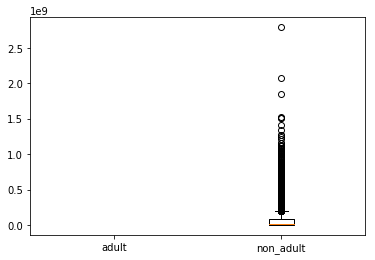

In [15]:
### answer Q5.1
adult = new_movies.loc[new_movies['adult'] == True]
adult = adult.dropna(subset = ['revenue'])

non_adult = new_movies.loc[new_movies['adult'] == False]
non_adult = non_adult.dropna(subset = ['revenue'])

plt.boxplot([adult['revenue'],non_adult['revenue']], labels = ['adult','non_adult'])
plt.show()

5.2 Histogram **(2 Marks)**

Draw a bar plot showing month of year (x-axis) versus total number of movies released on that month (y-axis). Each bar will represent the total number of movies released on a specific month across all years. 

Is there any relation between the month of the year and the total number of movies? Yes/No - Explain?

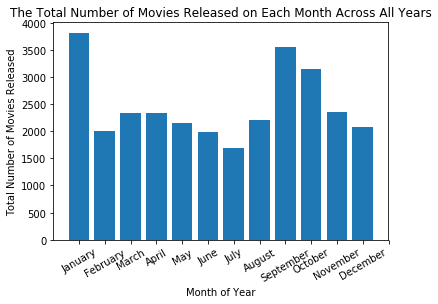

In [16]:
### answer code Q5.2
month = new_movies['release_date'].dt.month
movie_num = month.value_counts().sort_index()
index = np.arange(len(calendar.month_name))

plt.xticks(index, calendar.month_name[1:13], rotation=30)
plt.bar(range(12), movie_num)
plt.xlabel('Month of Year')
plt.ylabel('Total Number of Movies Released')
plt.title('The Total Number of Movies Released on Each Month Across All Years')
plt.show()

5.3 Scatter plot **(3 Marks)**

In this question, we will analyze the relation between few columns in the movies dataset. Draw four plots with the following four scatter/line plots:
    
    1- Non-zero revenue movies (x-axis) versus number of genres.
    2- Non-zero revenue movies (x-axis) versus release year.
    3- Non-zero revenue movies (x-axis) versus runtime.
    4- Non-zero revenue movies (x-axis) versus vote average.
    
Pick one of the four plots and justify/explain the relation between the two attributes. You should mention whether the relation is positive, negative or random. Did you expect this type of relation, Yes/No? Why?

D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


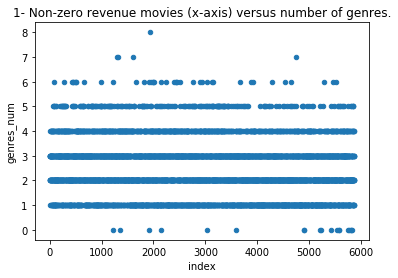

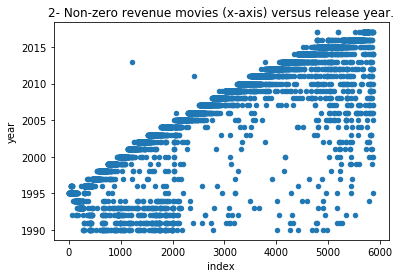

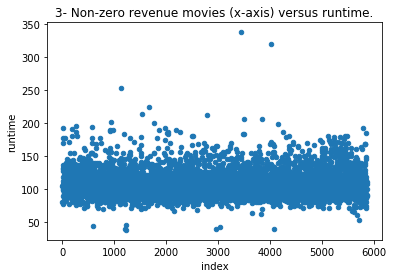

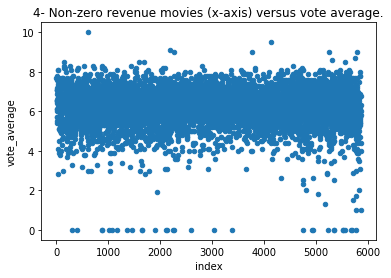

In [17]:
### answer Q5.3
df_with_genres_num = new_movies
genres_num = []

#count the number of genres for each movie, and put it as a new column
for gen in df_with_genres_num['genres_cleaned']:
    genres_num.append(len(gen))
df_with_genres_num['genres_num'] = genres_num

df_with_genres_num['year'] = df_with_genres_num['release_date'].dt.year

#delete rows with revenue with value NaN
df_with_genres_num = df_with_genres_num.dropna(subset = ['revenue'])

#create a new column with new indexes for the remaining records
df_with_genres_num['index'] = range(df_with_genres_num.shape[0])

df_with_genres_num.plot.scatter('index','genres_num', title = '1- Non-zero revenue movies (x-axis) versus number of genres.')
df_with_genres_num.plot.scatter('index','year', title = '2- Non-zero revenue movies (x-axis) versus release year.')
df_with_genres_num.plot.scatter('index','runtime', title = '3- Non-zero revenue movies (x-axis) versus runtime.')
df_with_genres_num.plot.scatter('index','vote_average', title = '4- Non-zero revenue movies (x-axis) versus vote average.')

plt.show()

5.4 Pie chart **(2 Marks)**

Create a pie chart showing the number of movies for each genre. For example, if a movie is classified as both comedey and action then the count for each of the action and comedey slices should be increased by 1. Each slice of the pie should have a different colour and contain a percentage number listing its relative size. Also, each slice of the pie should have a label next to it indicating which genre it corresponds to.

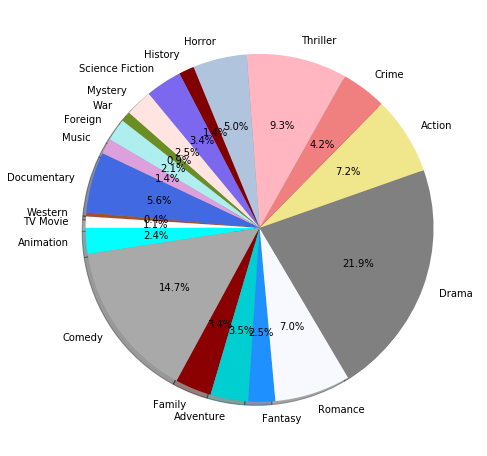

In [18]:
### answer Q5.4
genre = new_movies['genres_cleaned']
genre_dic = {}

#count the number of movies for each genre
#and put it as a dictionary with genre name as keys and number as values
for row in genre:
    for item in row:
        if item not in genre_dic.keys():
            genre_dic[item] = 1
        else:
            genre_dic[item] = genre_dic[item] +1 

sizes = genre_dic.values()
labels=genre_dic.keys()

#make sure all slices have different colors
color = [] 
for name in sorted(matplotlib.colors.cnames.keys())[20::6]:
    color.append(name)
    if len(color) == len(sizes):
        break

#make the plot larger so all names could have enough space to be read
plt.figure(figsize = (8,8))

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle = 180, colors = color)
plt.gca().set_aspect('equal')

plt.show()

5.5 Parallel co-ordinates **(4 Marks)**

In this question, we will the parallel co-ordinates plot to visualize the trend/relation between some of the features in the movies dataset. You should write the code that implements the following steps:

1. Delete all movies (rows) with missing values in any of the following features: budget, runtime, popularity, vote_average, and revenue. 

2. Then for each of the features, normalise its values to lie within the range [0-1] (0 to 1 inclusive). Use the the following formula for normalising a feature:

** $newvalue = (oldvalue - min) / (max - min) $ ** where min is the minimum value for the feature, max is the maximum value for the feature, newvalue is the normalised value for the feature and oldvalue is the old (un-normalised value).

3. Using these normalised features, compute the mean budget, runtime, popularity, vote_average, and revenue for each year. 

4. Finally, draw a parallel co-ordinates plot, each line correspondes to a different year. The ordering of the features for the plot should be budget(leftmost), runtime, popularity, vote_average, and revenue(rightmost). 

Colour the movies with $release\_year < 2000$ in red,  $2000 \geqslant release\_year < 2010 $ in green and $release\_year \geqslant 2010$ in blue. Provide a legend mapping colours to day type.

From the plot, can you see any relation between the revenue and popularity features? Yes/No- Explain? 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


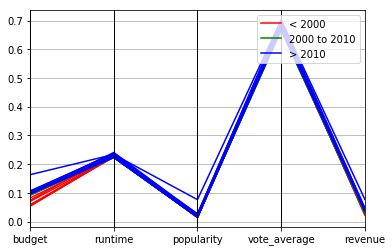

In [19]:
### answer Q5.5
col_names = ['budget', 'runtime', 'popularity', 'vote_average', 'revenue']
min_dic = {}
max_dic = {}
mean_dic = {}

normal = new_movies
normal = normal.dropna(subset = ['budget', 'runtime', 'popularity', 'vote_average', 'revenue'])

#replace values in normal dataframe with normalized values
for attr in col_names:
    min_dic[attr] = normal[attr].min()
    max_dic[attr] = normal[attr].max()
    normal[attr] = (normal[attr] - min_dic[attr])/(max_dic[attr] - min_dic[attr])
    
#calculate mean value for each year each column 
#put it in a dictionary mean_dic with column names as keys and means as values
#the order of dictionary items is sorted by year value, ascendingly
grouped = normal.groupby(normal['release_date'].dt.year)
for col in col_names:
    mean_lis = []
    for k, group in grouped:
        mean_lis.append(group[col].mean())
    mean_dic[col] = mean_lis

#create a new dataframe for plotting
final = pd.DataFrame(columns = ['year','budget', 'runtime', 'popularity', 'vote_average', 'revenue','period'])
final['year'] = list(range(1990,2018))

#turn the mean_dic into columns in the new dataframe
for key,value in mean_dic.items():
    final[key] = value
    
final['period'] = ['< 2000' if x<2000 else '> 2010' if x>=2010 else '2000 to 2010' for x in final['year']]

parallel_coordinates(final[['budget', 'runtime', 'popularity', 'vote_average', 'revenue','period']],'period',color=["r","g","b"])
plt.show()

### Marking scheme

Correctness (39 marks): For each of the 5 questions a mark will be allocated for level of correctness (does it provide the right answer, is the logic right), according to the number in parentheses next to each question. Note that your code should work for any data input formatted in the same way as Movies\_tmdb.csv. E.g. if a random sample of 20,000 records was taken from Movies\_tmdb.csv, your code should provide a correct answer if this was instead used as the input.

Correctness will also take into account the readability and labelling provided for any plots and figures (plots should include title of the plot, labels/scale on axes, names of axes, and legends for colours where appropriate).

Coding style <span style="color:red">**(1 Mark)**</span>: Mark will be allocated for coding style. In particular the following aspects will be considered:

- Formatting of code (e.g. use of indentation and overall readability for a human)   
- Code modularity and flexibility. Use of functions or loops where appropriate, to avoid redundant or excessively verbose definitions of code.
- Use of python library functions (you should avoid reinventing logic if a library function can be used instead)
- Code commenting and clarity of logic. You should provide comments about the logic of our code for each question, so that it can be easily understood by the marker.

### Submission Instructions
Via the LMS, submit a jupyter notebook containing the code. Make sure you get a submission receipt via email. If you didn't get a receipt via email, this means we didn't receive your submission and it will be considered as late submission.

### Other
Extensions and Late Submission Penalties: If requesting an extension due to illness, please submit a medical certificate to the lecturer. If there are any other exceptional circumstances, please contact the lecturer with plenty of notice. Late submissions without an approved extension will attract a penalty of 10% of the marks available per 24hr period (or part thereof)
that it is late. E.g. A late submission will be penalised 2 marks if 4 hours late, 4 marks if 28 hours late, 6 marks if 50 hours late, 8 marks if 73 hours late, 10 marks if 106 hours late, etc.

Phase 1 is expected to require 20-24 hours work.

### Academic Honesty

You are expected to follow the academic honesty guidelines on the University website
https://academichonesty.unimelb.edu.au

### Further Information

A project discussion forum has also been created on the subject LMS. Please use this in the first instance if you have questions, since it will allow discussion and responses to be seen by everyone. The Phase 1 project page will also contain a list of frequently asked questions.